In [2]:
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.pyplot as plt
from glob import glob
import xarray as xr
import pandas as pd
import numpy as np1
from pyresample import geometry, create_area_def
from satpy import Scene
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature

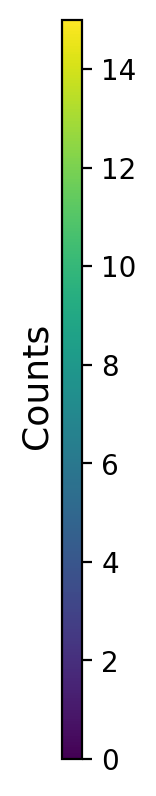

In [61]:
year= ''

cfile = glob('/home/hboi-ouri/Projects/RS_Files/MODISGrids/CombinedMODIS/CruiseaCDOM/*MODIS_L2_aCDOM.nc')

cfile.sort()

lat_0, lon_0 = 28.5, -90.8

lat_top=31
lat_bot=28
lon_left=-88
lon_rigth=-91
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})



land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='grey')

projection = ccrs.PlateCarree()
axes_class = (GeoAxes,
              dict(map_projection=projection))

fig = plt.figure(dpi=200) # set fig size

axgr = AxesGrid(fig, 111, #axes_class=axes_class,
                    nrows_ncols=(2, 2),
                    axes_pad=0.3,
                    #share_all=True,
                    cbar_location='right',
                    cbar_mode='single',
                    cbar_pad=0.3,
                    cbar_size='3%',
                    label_mode='L',
               )

#fig2 = plt.figure(dpi=200) # set fig size

# axgr2 = AxesGrid(fig2, 111, axes_class=axes_class,
#                     nrows_ncols=(3, 2),
#                     axes_pad=0.1,
#                     #share_all=True,
#                     cbar_location='right',
#                     cbar_mode='single',
#                     cbar_pad=0.4,
#                     cbar_size='3%',
#                     label_mode=''
#                 )

#for axTitle:
title = ['Oct 22, 2021 - Nov 14, 2021', 'Jul 15, 2021 - Jul 27, 2021', 
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']


for i, ax in enumerate(axgr):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.acdom.count('time')
        im = data.where(data!=0).plot(ax=axgr[i], vmin=0, vmax=15, x='lon', y='lat', add_colorbar=False) #transform=projection)
        ax.set_title(title[i], fontsize=8)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        ax.add_feature(land_50m)
    except:
        ax.remove()
        pass
axgr.cbar_axes[0].colorbar(im)

fig.text(0.78, 0.44, 'Counts', size=13, rotation=90)



fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task2/MODIS_CruiseGridCounts.png')
    